<a href="https://colab.research.google.com/github/UEPP40/PUM/blob/Pietruszkiewicz/uczenie_nienadzorowane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.impute import SimpleImputer

In [2]:
df = pd.read_csv("countries of the world.csv")

In [3]:
df.shape

(227, 20)

In [4]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [7]:
columns_c=['Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)', 'Net migration', 'Infant mortality (per 1000 births)', 'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)', 'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture', 'Industry', 'Service']
df[columns_c] = df[columns_c].replace(',', '.', regex=True)
df[columns_c] = df[columns_c].astype(float)
df[columns_c] = df[columns_c].fillna(df[columns_c].mean())

In [9]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000,227.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.856710,35.154225,10026.881258,18.920483,225.965194,12.982573,8.324390,16.069256,0.664484,11.102286,4.945670,0.141843,0.133288,0.160243
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.905000,8.215000,1900.000000,76.400000,38.500000,3.380000,0.190000,71.985000,2.000000,12.725000,5.975000,0.040000,0.200000,0.443500
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.050000,5600.000000,90.300000,181.600000,10.530000,1.080000,85.380000,2.000000,18.900000,8.170000,0.116000,0.282000,0.565283
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.980000,55.335000,15700.000000,97.800000,382.900000,20.000000,4.557111,95.230000,2.319512,29.770000,10.580000,0.211000,0.335000,0.671500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


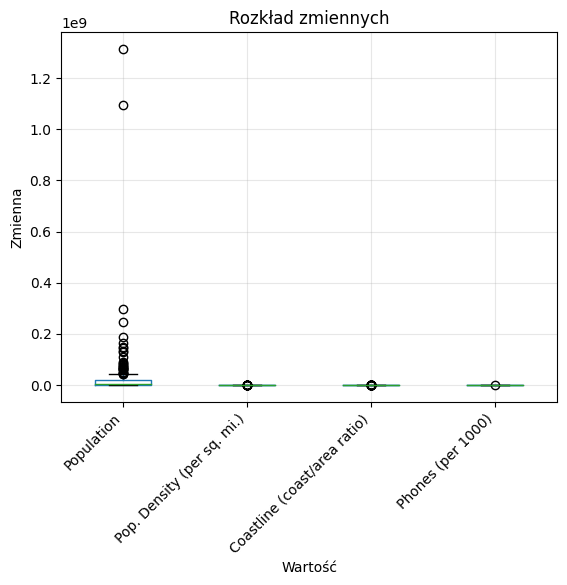

In [11]:
# Wykres pudełkowy z wartościami odstającymi
data_to_plot = df[['Population', 'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)','Phones (per 1000)']]
data_to_plot.boxplot()
plt.xticks(rotation=45, ha='right')
plt.xlabel('Wartość')
plt.ylabel('Zmienna')
plt.title('Rozkład zmiennych')
plt.grid(alpha=0.3)
plt.tight_layout
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler

# Stworzenie obiektu StandardScaler
scaler = StandardScaler()

# Standaryzacja danych

df[columns_c] = scaler.fit_transform(df[columns_c])
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),0.019695,0.027583,-0.199844,-0.293443,4.750696,3.636688,-0.898554,-2.481004,-1.032796,-0.128695,-0.523020,0.374938,-1.717937,2.210300,2.249075,1.619132,-0.321149,-1.158818e+00
1,Albania,EASTERN EUROPE,-0.213877,-0.318797,-0.153603,-0.275974,-1.025201,-0.398754,-0.518735,0.193960,-0.731200,0.562986,-0.017364,-0.445827,1.298569,-0.632321,-0.814901,0.573417,-0.712145,8.579033e-02
2,Algeria,NORTHERN AFRICA,0.035618,0.998421,-0.220490,-0.292889,-0.088346,-0.128489,-0.368806,-0.680038,-0.700597,-0.816517,-0.519408,0.928767,-1.717937,-0.449072,-0.938514,-0.352182,2.385742,-1.671672e+00
3,American Samoa,OCEANIA,-0.243834,-0.334779,-0.053514,0.514709,-4.281495,-0.747988,-0.168902,0.750140,0.103956,-0.293124,1.256409,-0.414019,-0.209684,0.031168,-1.210057,0.000000,0.000000,-6.943685e-16
4,Andorra,WESTERN EUROPE,-0.243720,-0.334629,-0.137002,-0.293443,1.354081,-0.896805,0.930574,0.909049,1.158212,-0.893713,-0.549507,1.006727,1.298569,-1.210053,-0.606178,0.000000,0.000000,-6.943685e-16


In [13]:
from sklearn.cluster import KMeans
n_clusters = 3
kmeans = KMeans(n_clusters = n_clusters, random_state = 42)

# Dopasowanie modelu KMeans do danych
kmeans.fit(df[columns_c])

# Przypisanie klastrów do danych
df['Cluster'] = kmeans.labels_

# Wyświetlenie wyników
print(df[['Country', 'Cluster']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


             Country  Cluster
0       Afghanistan         0
1           Albania         2
2           Algeria         2
3    American Samoa         2
4           Andorra         1
..               ...      ...
222       West Bank         2
223  Western Sahara         2
224           Yemen         0
225          Zambia         0
226        Zimbabwe         0

[227 rows x 2 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

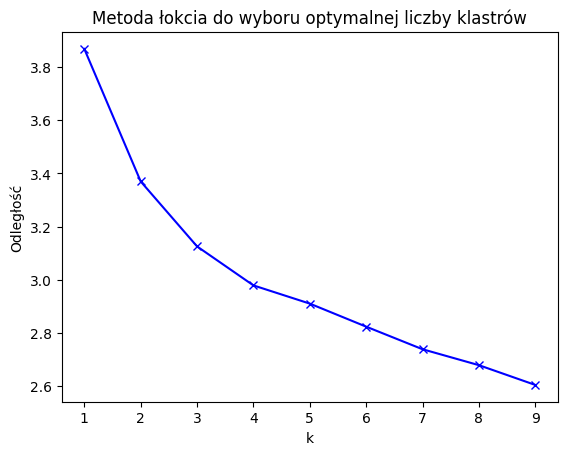

In [16]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np

# Inicjalizacja listy wyników
distortions = []

# Dopasowanie modelu KMeans do różnych wartości k
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df[columns_c])
    distortions.append(sum(np.min(cdist(df[columns_c], kmeans.cluster_centers_, 'euclidean'), axis=1)) / df[columns_c].shape[0])

# Wykres zależności odległości od liczby klastrów
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Odległość')
plt.title('Metoda łokcia do wyboru optymalnej liczby klastrów')
plt.show()

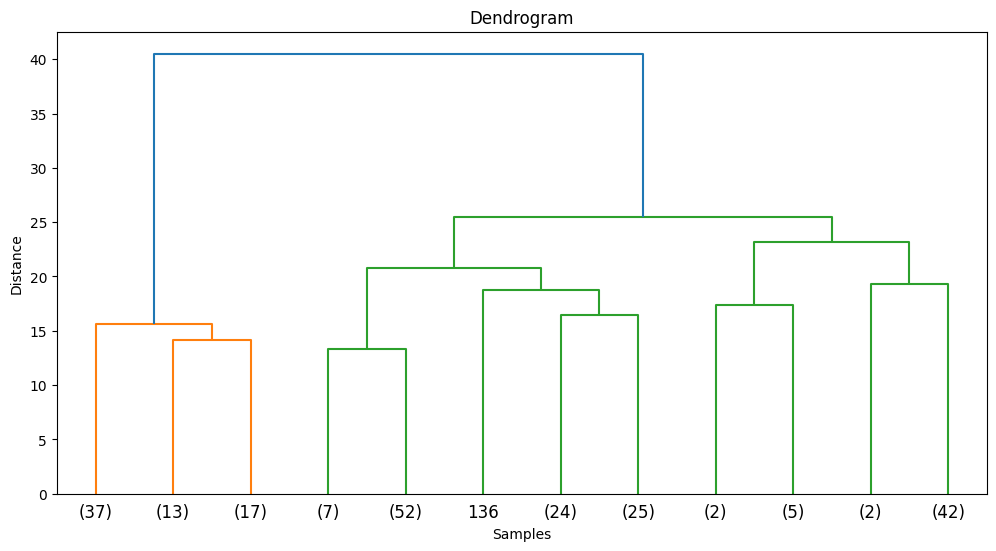

In [18]:
plt.figure(figsize=(12, 6))
dendrogram(linkage(df[columns_c], method='ward'), truncate_mode='lastp', p=12)
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

Podaj liczbę klastrów: 3


<ipython-input-23-8364af80437e>:24: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


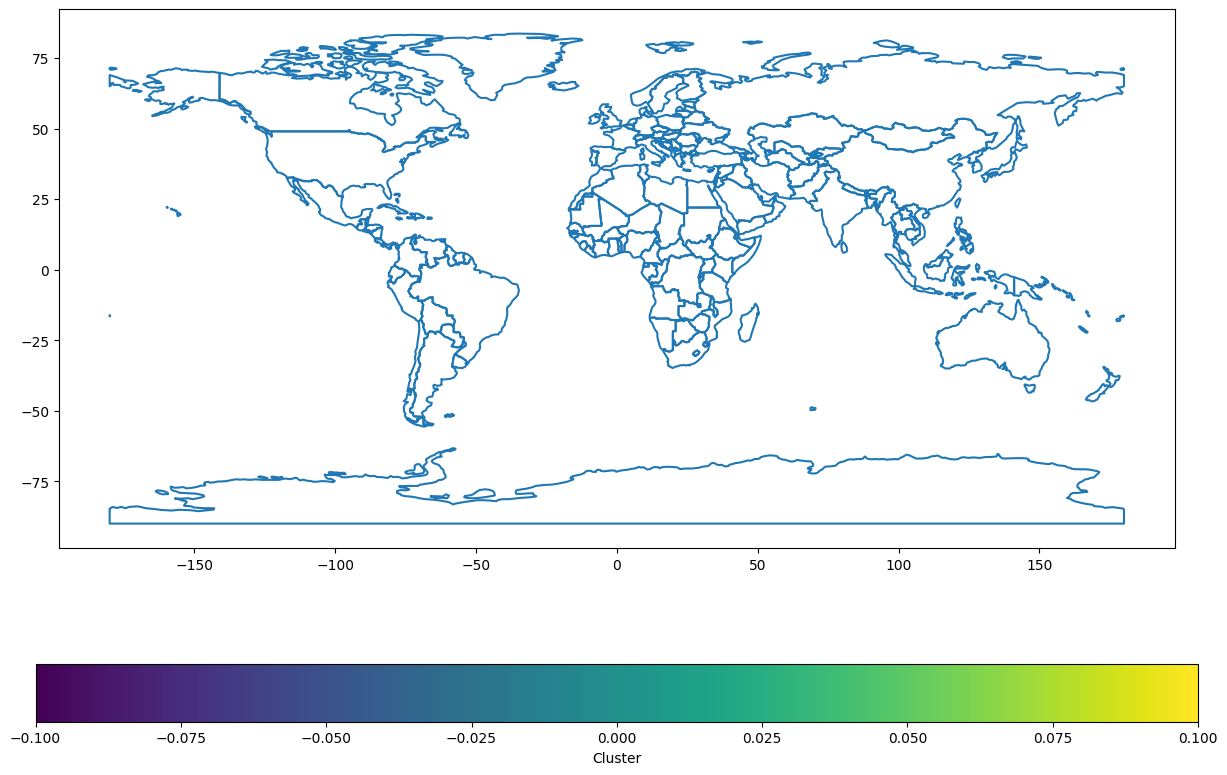

In [23]:
import pandas as pd
from scipy.cluster.hierarchy import fcluster, linkage
from scipy.spatial.distance import pdist
import geopandas as gpd
import matplotlib.pyplot as plt

def perform_clustering(countries_scaled, df, n_clusters):
    # Compute the distance matrix
    distance = pdist(countries_scaled)

    # Compute the linkage matrix using the Ward method
    linkage_matrix = linkage(distance, method='ward')

    # Assign cluster labels
    cluster_labels = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')

    # Add cluster labels to the DataFrame
    df['Cluster'] = cluster_labels

    return df

def plot_clusters(df):
    # Load world map
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Ensure country names are properly formatted
    df['Country'] = df['Country'].str.strip()

    # Merge the cluster data with the world map data
    world = world.merge(df[['Country', 'Cluster']], left_on='name', right_on='Country', how='left')

    # Plot the world map with clusters
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    world.boundary.plot(ax=ax)
    world.plot(column='Cluster', ax=ax, legend=True,
               legend_kwds={'label': "Cluster", 'orientation': "horizontal"})
    plt.show()

def main():
    # Placeholder for loading data (replace with actual data loading logic)
    # Load or create your 'countries_scaled' DataFrame here
    # Load or create your 'df' DataFrame here

    # Example placeholder data (replace with actual data)
    countries_scaled = pd.DataFrame({
        'Feature1': [0.1, 0.2, 0.3, 0.4],
        'Feature2': [0.5, 0.6, 0.7, 0.8]
    })
    df = pd.DataFrame({
        'Country': ['Country1', 'Country2', 'Country3', 'Country4']
    })

    # Get the number of clusters from the user
    try:
        how_many_clusters = int(input("Podaj liczbę klastrów: "))
    except ValueError:
        print("Invalid input. Please enter an integer.")
        return

    # Perform clustering
    df_clustered = perform_clustering(countries_scaled, df, how_many_clusters)

    # Plot the resulting clusters on the world map
    plot_clusters(df_clustered)

if __name__ == "__main__":
    main()
